<a href="https://colab.research.google.com/github/Thalamicks/MachineLearningCourse/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Let us consider the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In the dataset we have data regarding specific species of flowers :
- Sepal length;
- Sepal width;
- Petal length;
- Petal width;
- Species (*Iris setosa*, *Iris virginica* e *Iris versicolor*).

In the specific, we have N = 150 total samples (50 per class).

<img src='https://drive.google.com/uc?id=1cBVClKfJOVXwK-VCjwd9XzRgCN-wvec_' width=250>

## Loading


We need to import **matplotlib** and **pandas** to handle data and plots.

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

We can find the dataset we need to analyse online. We use pandas to load the csv to a **pandas.DataFrame**.

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

We can start to have a look the data we have

In [6]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we do not care about the flower species in this lesson, hence we remove that column:

In [9]:
dataset = dataset.drop('class', axis=1)

In [10]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will try to understand how the feature are distributed, by printing some statistics:

In [11]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizing data can also be very helpful:

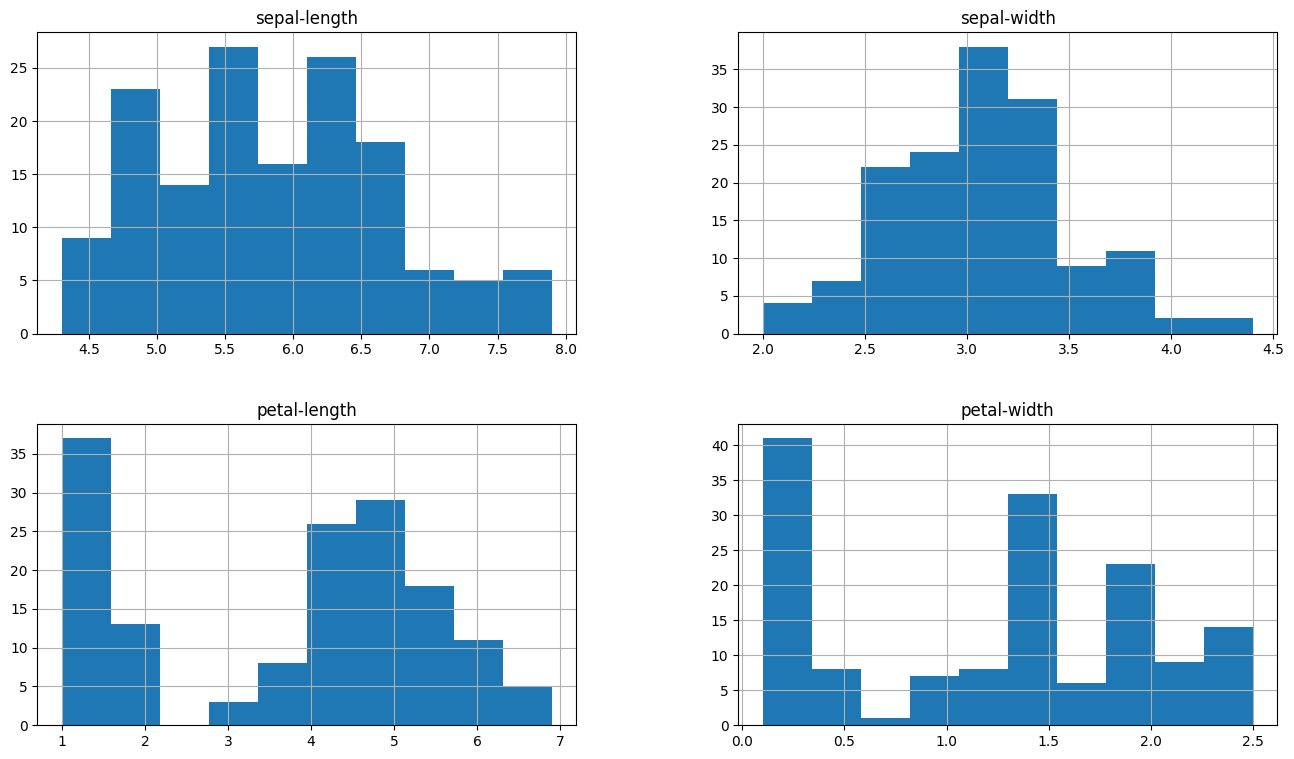

In [12]:
dataset.hist(figsize=(16,9))
plt.show()

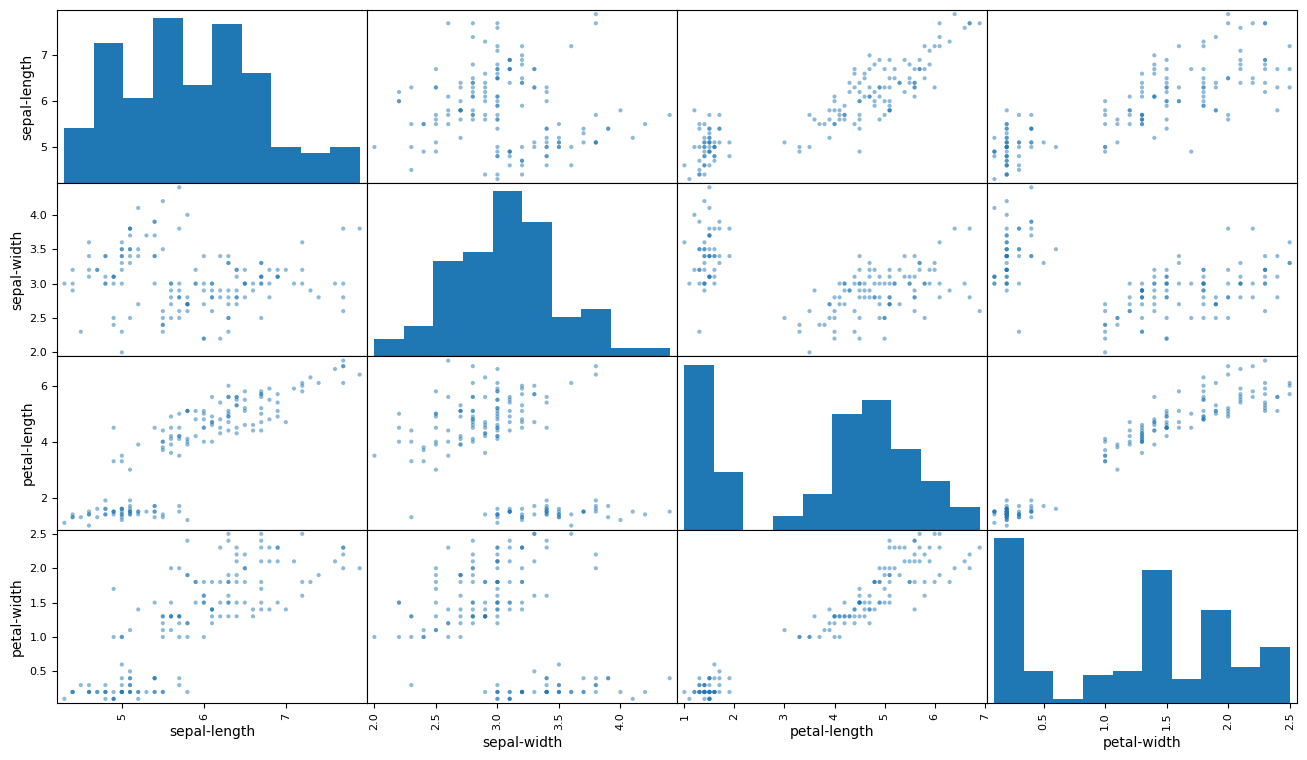

In [13]:
scatter_matrix(dataset, figsize=(16, 9))
plt.show()

*petal-lenght* and *petal-width* seem to have a strong relationship... we should investigate it more in detail!

<Axes: xlabel='petal-length', ylabel='petal-width'>

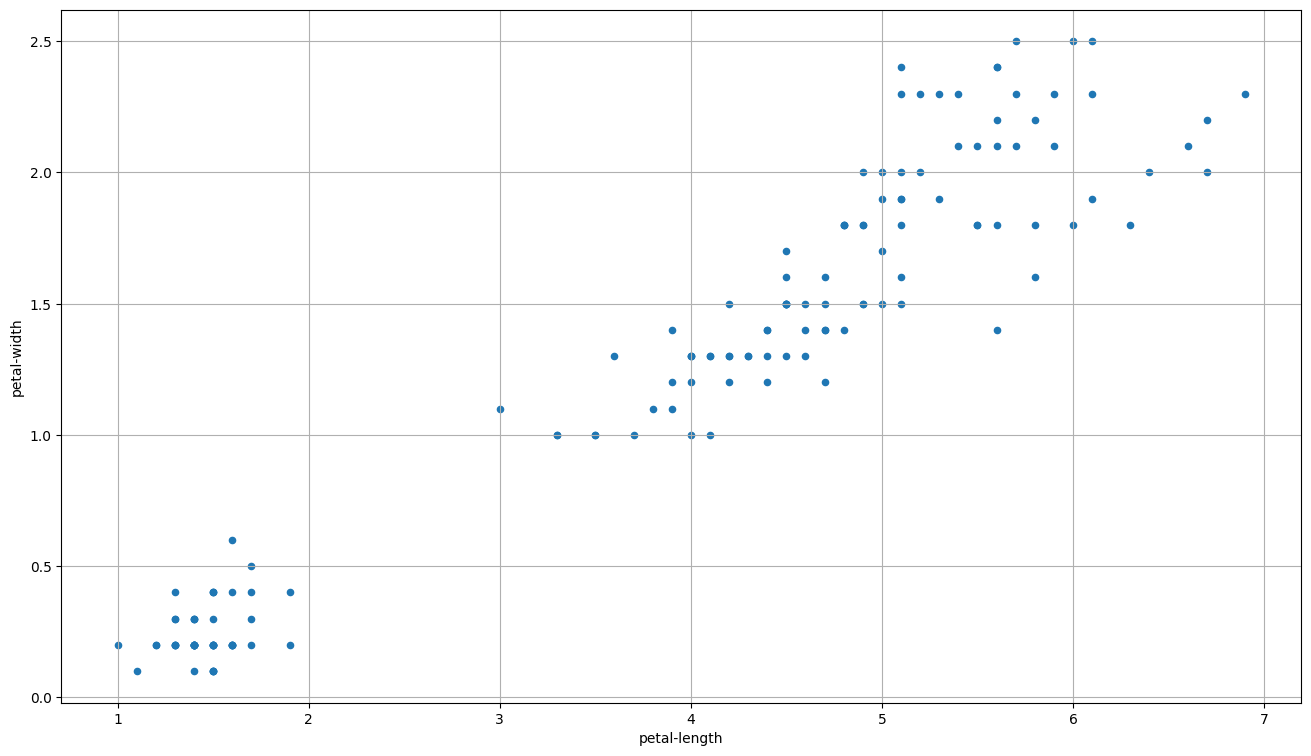

In [14]:
dataset.plot.scatter('petal-length', 'petal-width', grid=True, figsize=(16,9))

## Preprocessing

Once we inspected the data, we should operate some preprocessing procedures. On a
generic dataset one should perform:

- shuffling;
- remove inconsistent data;
- remove outliers;
- normalize or standardize data;
- fill missing data.

In this case we are going to use the entire dataset, with a non-iterative method, hence we do not need to **shuffle**.

There seems not to be **outliers** from previous inspection.

Is there any **missing data**?

In [15]:
import numpy as np

In [16]:
np.any(np.isnan(dataset.values))

np.False_

we are lucky, no missing data, no outliers...

However it is always better to work with data in the same scale, hence we should normalize the columns we are going to use.

\begin{align*}
	s &\leftarrow \frac{s - \bar{s}}{S} \\
	s &\leftarrow \frac{s - \min_n \{ s_n \}}{\max_n \{ s_n \} - \min_n \{ s_n \}}
\end{align*}

The **zscore** function operates a standardization of its inputs.

In [17]:
from scipy.stats import zscore

In [18]:
x = zscore(dataset['petal-length'].values).reshape(-1, 1) # we reshape our feature column as a (n_sample, n_features) matrix
y = zscore(dataset['petal-width'].values)

## Using Scikit-Learn Toolbox

In [24]:
x.shape

(150, 1)

In [25]:
np.mean(x)

np.float64(3.315866100213801e-16)

In [26]:
np.std(x)

np.float64(0.9999999999999998)

In [19]:
from sklearn import linear_model

In [20]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x, y)

LinearRegression()

since we want to customize our plot, we will use matplotlib directly this time:

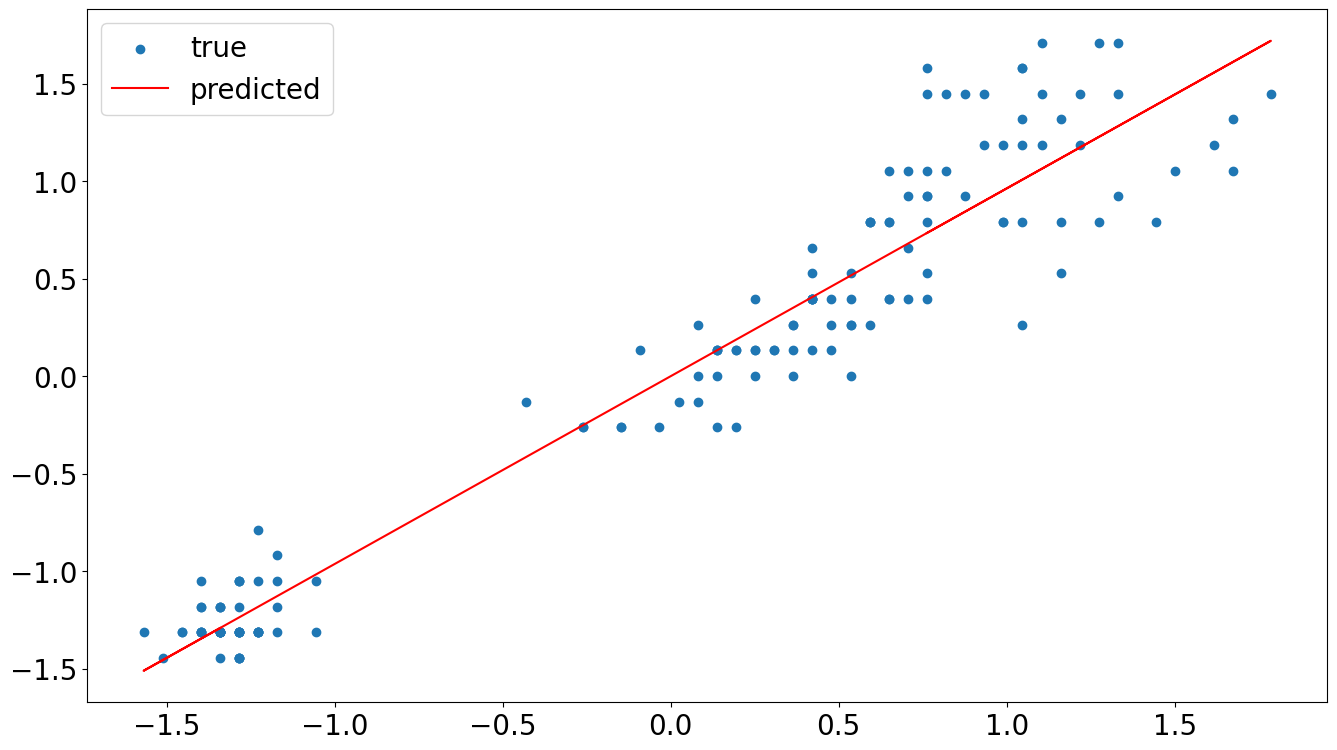

In [21]:
 #with plt.style.context('seaborn'): # use your favorite style, if you don't like the standard one
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(x, y, label='true')

w1 = lin_model.coef_ # weights of the model are stored here
w0 = lin_model.intercept_ # and here it is the intercept

  # Compute the y component of the regression line

y_pred = lin_model.predict(x)
#y_pred = [w1 * sample + w0 for sample in x.flatten()]

# (we used a list comprehension here, have a look to the python tutorial
#  if you don't know what it is!)

plt.plot(x, y_pred, label='predicted', color='red')

# enlarging fonts
plt.legend(prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

To evaluate the quality of our regression we can analyse some metrics:

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

### Residual Sum of Squares

$RSS = \sum_n (\hat{t}_n-t_n)^2$, it tells us how much of the prediction differs from the true value.

In [67]:
RSS = np.sum((y_pred-y)**2)
RSS

np.float64(9.292779832215205)

### Coefficient of determination

$R^2 = 1 - \frac{RSS}{\sum_n (\bar{t}-t_n)^2}$, it tells us how the fraction of the variance of the data explained by the model (how much better we are doing w.r.t. just using the mean of the target $\bar{t} = \frac{\sum_n t_n}{N}$).

In spaces with a single feature this is equal to the correlation coefficient between the input and the output;

For a more detailed explanation: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [69]:

r2_score(y, y_pred)

0.9380481344518986

### Mean Squared Error

$MSE = \frac{\sum_n (\hat{t}_n-t_n)^2}{N}$, it tells approximately how much error we get on a predicted data over the training set (i.e., a normalized version of the RSS).

In [70]:
 mean_squared_error(y, y_pred)

0.061951865548101365

Under the assumption that the observations $t_n$ are i.i.d. and satisfies $t_n = w_0 + \sum_j w_j x_{nj} + \epsilon$, where $\epsilon$ is a Gaussian noise with zero mean and variance $\sigma^2$ (i.e., the data are generated by a linear model with noise), the computed coefficients $\hat{w}_j$ are distributed as follows:
\begin{equation*}
	\frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M -1}
\end{equation*}
where $w_j$ is the true parameter, $\hat{\sigma}$ is the unbiased estimated for the target variance, i.e., $\hat{\sigma}^2 = \frac{\sum_n (t_n - \hat{t}_n)^2}{N - M - 1}$, $v_j$ is the $j$-th diagonal element of the matrix $(X^T X)^{-1}$ and $t_{N - M-1}$ is the t-student distribution with $N - M - 1$ degrees of freedom.

This allow us to formulate some **statistical tests**:

### Single coefficients statistical test:
$$H_0: w_j = 0 \qquad \text{ vs. } \qquad H_1: w_j \neq 0$$
\begin{equation*}
t_{stat} = \frac{\hat{w}_j - w_j}{\hat{\sigma} \sqrt{v_j}} \sim t_{N - M - 1}
\end{equation*}
where $t_{N - M - 1}$ is the T-Student distribution with $N-M-1$ degrees of freedom

### Overall significance of the model: F-statistic

It considers the following hypothesis test:

$$H_0: w_1 = \dots = w_M = 0 \text{ vs. }  H_1: \exists w_j \neq 0$$


The F-statistic can be computed and is distributed as follows:
$$ F = \frac{dfe}{M }\frac{\sum_n (\overline{t}_n-t_n)^2- RSS}{RSS} \sim F_{M, N-M-1} $$

where $F_{M, N-M-1}$ is the Fisher-Snedecor distribution with parameters $M$ and $N-M-1$.

In [71]:
f_regression(x, y) # it outputs a tuple: (value of the F-statistics, its p-value)

(array([ 299.1949571 ,   21.55437779, 1876.65781288]),
 array([2.31484915e-37, 7.52389096e-06, 5.77666099e-86]))

If one wants all the information about the output of a linear model in a single instruction, just use the library **statsmodels** and use the function **summary()** on the result of the Ordinary Least Square optimization procedure

In [72]:
from statsmodels import api as sm
lin_model2 = sm.OLS(y, x).fit()
print(lin_model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              741.9
Date:                Fri, 09 May 2025   Prob (F-statistic):                    1.55e-88
Time:                        14:03:06   Log-Likelihood:                         -4.2360
No. Observations:                 150   AIC:                                      14.47
Df Residuals:                     147   BIC:                                      23.50
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
lin_model2._results.params

array([-0.22815451,  0.12998113,  1.2163109 ])

In [74]:
lin_model2._results.k_constant

0

## Custom Implementation

We can also implement Least-Squares from scratch, using its closed-form:

\begin{equation}
\hat{\mathbb{w}}_{OLS} = (\mathbb{\Phi}^{\top}\mathbb{\Phi})^{-1}\mathbb{\Phi}^{\top}\ \mathbb{t},
\end{equation}

where $\mathbb{\Phi}= (\phi(x_1), \dots, \phi(x_N))^{\top}$ and $\mathbb{t} = (t_1, \dots, t_N)^{\top}.$

By using **numpy**:


In [38]:
from numpy.linalg import inv

n_samples = len(x)
Phi = np.ones((n_samples, 2))
Phi[:, 1] = x.flatten() # the second column is the feature
# the field 'T' represents the transposed matrix, @ is the matrix product, the method 'dot' is the matrix product
w = inv(Phi.T @ Phi) @ (Phi.T.dot(y))

In [45]:
Phi @ w

array([-1.29131953, -1.29131953, -1.34606739, -1.23657167, -1.29131953,
       -1.12707595, -1.29131953, -1.23657167, -1.29131953, -1.23657167,
       -1.23657167, -1.18182381, -1.29131953, -1.45556311, -1.40081525,
       -1.23657167, -1.34606739, -1.29131953, -1.12707595, -1.23657167,
       -1.12707595, -1.23657167, -1.51031097, -1.12707595, -1.01758023,
       -1.18182381, -1.18182381, -1.23657167, -1.29131953, -1.18182381,
       -1.18182381, -1.23657167, -1.23657167, -1.29131953, -1.23657167,
       -1.40081525, -1.34606739, -1.23657167, -1.34606739, -1.23657167,
       -1.34606739, -1.34606739, -1.34606739, -1.18182381, -1.01758023,
       -1.29131953, -1.18182381, -1.29131953, -1.23657167, -1.29131953,
        0.51535986,  0.40586414,  0.62485558,  0.13212484,  0.460612  ,
        0.40586414,  0.51535986, -0.25111018,  0.460612  ,  0.07737698,
       -0.14161446,  0.24162056,  0.13212484,  0.51535986, -0.0868666 ,
        0.35111628,  0.40586414,  0.1868727 ,  0.40586414,  0.07

## Regularization

If we need to mitigate over-fitting effects in a model we might resort to some regularization techniques, like Ridge regression or Lasso regression.

### Ridge Regression
Linear least squares with l2 regularization.

In [48]:
ridge_model = linear_model.Ridge(alpha=10)
ridge_model.fit(x, y)

Ridge(alpha=10)

### Lasso Regression

Linear Model trained with L1 prior as regularizer.

In [49]:
lasso_model = linear_model.Lasso(alpha=10)
lasso_model.fit(x, y)

Lasso(alpha=10)

In [51]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

ValueError: x and y must be the same size

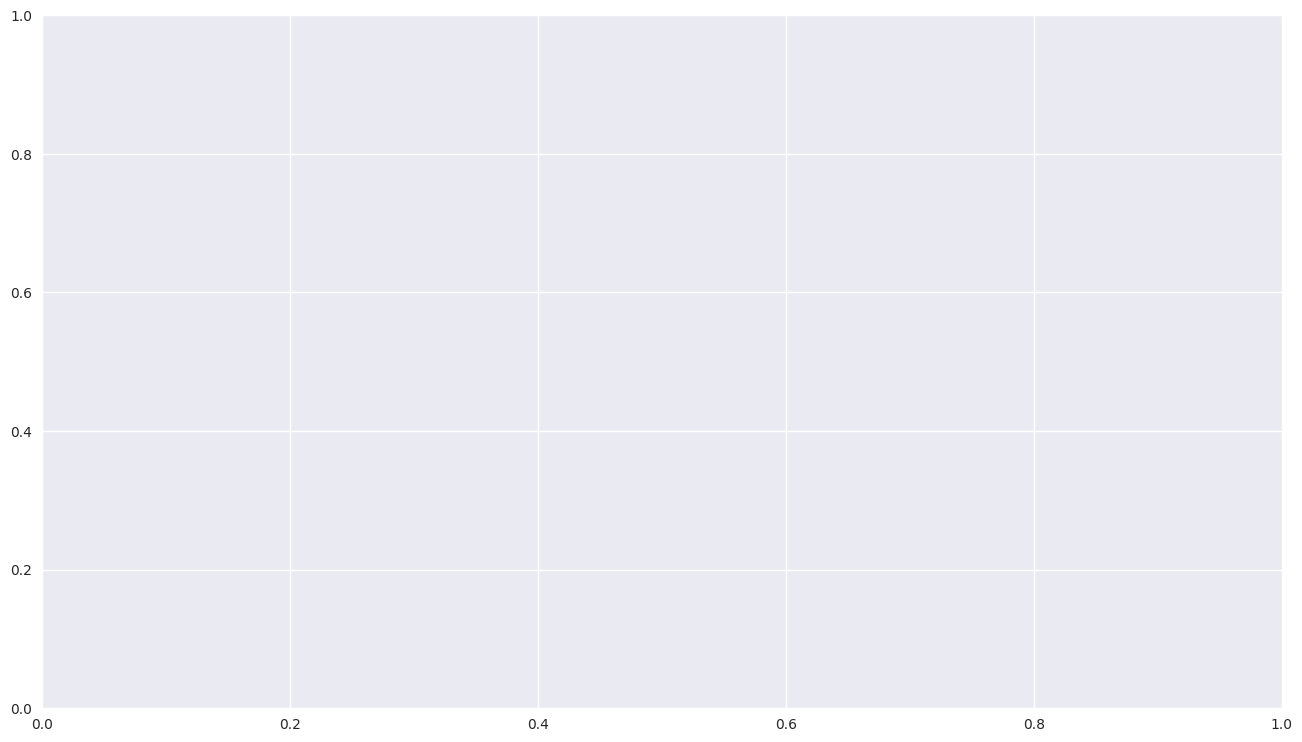

In [76]:
 with plt.style.context('seaborn-v0_8'):
  plt.figure(figsize=(16,9))
  plt.scatter(x, y, label='original samples')
  y_linear = [lin_model.coef_ * x_i + lin_model.intercept_ for x_i in x]
  plt.plot(x, y_linear, label='linear regression', color='red')
  for alpha in [0.1, 0.2, 0.5]:
    # lasso regression
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(x, y)
    y_lasso = [lasso_model.coef_ * x_i + lasso_model.intercept_ for x_i in x]
    plt.plot(x, y_lasso, label='lasso, alpha={}'.format(alpha))


  # enlarging fonts
  plt.legend(prop={'size': 20})
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  plt.show()

In [53]:
mean_squared_error(y, lasso_model.predict(x))

0.3230987720779964

## Homeworks

Here we propose some exercises in python for you. They are not mandatory, but they can be helpful to better understand the contents of the lecture, by giving you the opportunity to develop some code by yourself.

### 1) Predicting petal width

Consider again the Iris dataset, and complete the following code, by writing a script which is able to predict the petal width by using, this time, **all** the other features as input.


In [77]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

dataset = dataset.drop('class', axis=1)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
# Get input and output

# Use 1 feature (e.g., petal-length only)
x1 = zscore(dataset[['petal-length']].values)

# Use 3 features
x3 = zscore(dataset[['sepal-length', 'sepal-width', 'petal-length']].values)

y = zscore(dataset['petal-width'].values)

# One-feature model
lin1 = linear_model.LinearRegression().fit(x1, y)

# Three-feature model
lin3 = linear_model.LinearRegression().fit(x3, y)

In [91]:
# Predictions and RSS
y_pred1 = lin1.predict(x1)
y_pred3 = lin3.predict(x3)
rss1 = np.sum((y - y_pred1)**2)
rss3 = np.sum((y - y_pred3)**2)

print(f"Residual Sum of Squares (RSS) with 1 feature: {rss1}")
print(f"Residual Sum of Squares (RSS) with 3 feature: {rss3}")

Residual Sum of Squares (RSS) with 1 feature: 10.964815811699456
Residual Sum of Squares (RSS) with 3 feature: 9.292779832215205


In [96]:
R2_1 = r2_score(y, y_pred1)
R2_3 = r2_score(y, y_pred3)

print(f"Coefficient of determination with 1 feature: {R2_1}")
print(f"Coefficient of determination with 3 feature: {R2_3}")

Coefficient of determination with 1 feature: 0.9269012279220037
Coefficient of determination with 3 feature: 0.9380481344518986


In [100]:
MSE_1 = mean_squared_error(y, y_pred1)
MSE_3 = mean_squared_error(y, y_pred3)

print(f"Mean Squared Error with 1 feature: {MSE_1}")
print(f"Mean Squared Error with 3 feature: {MSE_3}")

Mean Squared Error with 1 feature: 0.07309877207799637
Mean Squared Error with 3 feature: 0.061951865548101365


In [103]:
f_regression(x1, y)

(array([1876.65781288]), array([5.77666099e-86]))

In [104]:
f_regression(x3, y)

(array([ 299.1949571 ,   21.55437779, 1876.65781288]),
 array([2.31484915e-37, 7.52389096e-06, 5.77666099e-86]))

In [105]:
lin_model3 = sm.OLS(y, x3).fit()
print(lin_model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              741.9
Date:                Fri, 09 May 2025   Prob (F-statistic):                    1.55e-88
Time:                        14:23:55   Log-Likelihood:                         -4.2360
No. Observations:                 150   AIC:                                      14.47
Df Residuals:                     147   BIC:                                      23.50
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Comment on the parameters we would like to introduce or exclude from the prediction process.

Does this model is better than the one trained with a single input?

- Yes

How do you check if the two models are significantly different from each other?
- The RSS is lower with 3 features
- The R^2 is higher
- The MSE is lower

*(hint: look at the exercise session on Bias-Variance tradeoff)*

### 2) Implementing closed-form ridge regression
Ridge regression can be obtained in closed form, as we have seen at lesson. Implement it by yourself, by completing the code below.

In [107]:
def closed_form_ridge(X, y, alpha):
    # Add a column of ones to X for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Identity matrix, same shape as X_b.T * X_b
    I = np.identity(X_b.shape[1])
    I[0, 0] = 0  # Do not regularize the intercept term

    # Closed-form solution for Ridge Regression
    w_ridge = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y)

    return w_ridge

In [121]:
alpha = 100
ridge_model = linear_model.Ridge(alpha=alpha)
ridge_model.fit(x3, y)

ridge_predictions = ridge_model.predict(x3)


# Evaluate Ridge model performance
ridge_rss = np.sum((y - ridge_predictions)**2)
ridge_r2 = r2_score(y, ridge_predictions)
ridge_mse = mean_squared_error(y, ridge_predictions)

print(f"Ridge Regression - RSS: {ridge_rss}")
print(f"Ridge Regression - R²: {ridge_r2}")
print(f"Ridge Regression - MSE: {ridge_mse}")


w = closed_form_ridge(x3, y, alpha)

# Compare your solution it with the scikit-learn one!
full_coefficients = np.concatenate(([ridge_model.intercept_], ridge_model.coef_))
assert np.allclose(w, full_coefficients), 'Something wrong!, try again...'

print("\nClosed-Form Solution Coefficients (including intercept):")
print(w)

print("\nScikit-learn Ridge Model Coefficients (including intercept):")
print(full_coefficients)

Ridge Regression - RSS: 27.18198162070587
Ridge Regression - R²: 0.8187867891952942
Ridge Regression - MSE: 0.1812132108047058

Closed-Form Solution Coefficients (including intercept):
[-1.76941795e-16  2.68055947e-01 -9.18086782e-02  4.14282710e-01]

Scikit-learn Ridge Model Coefficients (including intercept):
[-3.55495946e-16  2.68055947e-01 -9.18086782e-02  4.14282710e-01]


### 3) Implementing LS for multiple outputs

We have seen at lesson that LS is possible also when we have multiple outputs.

Implement it by extending the LS custom implementation that we have seen.

In [122]:
def closed_form_ls_multiple_outputs(X, Y):
    """
    Closed-form solution for Least Squares (LS) with multiple outputs.

    Parameters:
    X (numpy.ndarray): The input feature matrix (n_samples x n_features).
    Y (numpy.ndarray): The target matrix with multiple outputs (n_samples x n_outputs).

    Returns:
    numpy.ndarray: The matrix of coefficients (n_features + 1 x n_outputs).
    """
    # Add a column of ones to X for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Compute the closed-form solution for multiple outputs
    # w = (X_b^T * X_b)^(-1) * X_b^T * Y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

    return w

In [129]:
def predict(X, w):
    # Add a column of ones to X for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Predictions using the coefficients
    y_pred = X_b.dot(w)

    return y_pred

In [130]:
def evaluate_model(X, y_true, w):
    # Predict using the closed-form solution coefficients
    y_pred = predict(X, w)

    # Calculate Mean Squared Error (MSE) and R² score for each output
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Calculate Residual Sum of Squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)

    return mse, r2, rss

In [131]:
w_multi = closed_form_ls_multiple_outputs(x3, y)

print("Coefficients for Multiple Outputs (including intercept):")
print(w_multi)

mse, r2, rss = evaluate_model(x3, y, w_multi)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Residual Sum of Squares (RSS): {rss}")

Coefficients for Multiple Outputs (including intercept):
[-2.30718222e-16 -2.28154510e-01  1.29981134e-01  1.21631090e+00]
Mean Squared Error (MSE): 0.06195186554810138
R² Score: 0.9380481344518986
Residual Sum of Squares (RSS): 9.292779832215206


### 4) Try it on another dataset

Try to repeat the procedure that we have seen for the Iris dataset on a new dataset of your choice:

- select a dataset (many are available online, e.g. https://www.kaggle.com/datasets)
- visualize data, in order to spot interesting relationships
- preprocess data
- apply linear regression

In [ ]:
### WRITE YOUR CODE HERE ###

In [132]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahdimashayekhi/fake-news-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.2M/11.2M [00:00<00:00, 88.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mahdimashayekhi/fake-news-detection-dataset/versions/1


In [138]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset (for example, to a specific folder)
api.dataset_download_files('mahdimashayekhi/fake-news-detection-dataset', path='fake_news_dataset', unzip=True)

# Now, you can load it using pandas
import pandas as pd
df = pd.read_csv('fake_news_dataset/fake_news_dataset.csv')

# Print the first 5 records
print("First 5 records:", df.head())


OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [140]:
from google.colab import files
files.upload()  # Upload kaggle.json file

# Move kaggle.json to the correct location
import os
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("fake_news_dataset.csv", "/root/.kaggle/fake_news_dataset.csv")


Saving fake_news_dataset.csv to fake_news_dataset (1).csv


In [145]:
import pandas as pd

# File path for the dataset in the Kaggle input directory
file_path = "/kaggle/input/fake-news-detection-dataset/fake_news_dataset.csv"  # Adjust based on actual file name

# Load the dataset directly with pandas
df = pd.read_csv(file_path)

# Show the first 5 records of the dataset
print("First 5 records:", df.head())


First 5 records:                                   title  \
0               Foreign Democrat final.   
1   To offer down resource great point.   
2          Himself church myself carry.   
3                  You unit its should.   
4  Billion believe employee summer how.   

                                                text        date    source  \
0  more tax development both store agreement lawy...  2023-03-10  NY Times   
1  probably guess western behind likely next inve...  2022-05-25  Fox News   
2  them identify forward present success risk sev...  2022-09-01       CNN   
3  phone which item yard Republican safe where po...  2023-02-07   Reuters   
4  wonder myself fact difficult course forget exa...  2023-04-03       CNN   

                 author    category label  
0          Paula George    Politics  real  
1           Joseph Hill    Politics  fake  
2        Julia Robinson    Business  fake  
3  Mr. David Foster DDS     Science  fake  
4         Austin Walker  Technology

In [149]:
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [150]:
df.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Turn present write decision town human personal.,suffer tree increase prevent organization easy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [159]:
# Check for missing values in the entire dataset
print(df.isna().sum())
df['source'] = df['source'].fillna('Unknown')
df['author'] = df['author'].fillna('Unknown')

title       0
text        0
date        0
source      0
author      0
category    0
label       0
dtype: int64


In [160]:
df['date'] = pd.to_datetime(df['date'])

In [161]:
# Encode 'source', 'author', 'category', and 'label' using one-hot encoding or label encoding
df = pd.get_dummies(df, columns=['source', 'author', 'category'], drop_first=True)

# Encode 'label' (real/fake) as 1 and 0 for binary classification
df['label'] = df['label'].map({'real': 1, 'fake': 0})


In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'text' column (convert text into numerical features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = vectorizer.fit_transform(df['text'])

# Now you have the vectorized text data (X_text) and other features for modeling


In [163]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['label', 'text'])  # Drop 'label' and 'text' columns from features
y = df['label']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'text' column
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = vectorizer.fit_transform(df['text'])



In [2]:
X_structured = df.drop(columns=['text', 'title', 'label']).copy()

# Convert 'date' to datetime if it's not already
X_structured['date'] = pd.to_datetime(X_structured['date'], errors='coerce')

# Extract useful date features
X_structured['year'] = X_structured['date'].dt.year
X_structured['month'] = X_structured['date'].dt.month
X_structured['dayofweek'] = X_structured['date'].dt.dayofweek

# Drop original date column
X_structured = X_structured.drop(columns=['date'])

# One-hot encode categorical features
X_structured = pd.get_dummies(X_structured, drop_first=True)

# Convert to float
X_structured = X_structured.astype(float)

NameError: name 'df' is not defined